## **Obtencion de datos**

Con ayuda de MediaPipe, se generaron coordenadas tridimensionales (x, y, z) para cada articulación, las cuales componen el conjunto de datos base.

Primero, se asignó una etiqueta que funcionará como la clase en cada frame, permitiendo identificar la acción que se realiza en el video y extrayendo las coordenadas tridimensionales de las articulaciones.

- 0 - nose
- 1 - left eye (inner)
- 2 - left eye
- 3 - left eye (outer)
- 4 - right eye (inner)
- 5 - right eye
- 6 - right eye (outer)
- 7 - left ear
- 8 - right ear
- 9 - mouth (left)
- 10 - mouth (right)
- 11 - left shoulder
- 12 - right shoulder
- 13 - left elbow
- 14 - right elbow
- 15 - left wrist
- 16 - right wrist
- 17 - left pinky
- 18 - right pinky
- 19 - left index
- 20 - right index
- 21 - left thumb
- 22 - right thumb
- 23 - left hip
- 24 - right hip
- 25 - left knee
- 26 - right knee
- 27 - left ankle
- 28 - right ankle
- 29 - left heel
- 30 - right heel
- 31 - left foot index
- 32 - right foot index

Se decidió agrupar cada 5 frames para asegurar un entrenamiento adecuado del modelo. Esto permite que el modelo detecte cambios significativos en las coordenadas, algo que sería más difícil si se analizara cada frame por separado. Al agrupar los frames, el modelo puede captar mejor el cambio en las coordenadas a través de diferentes movimientos, proporcionando contexto sobre cómo el cuerpo cambia de posición en el tiempo. Estos patrones temporales son esenciales para que el modelo aprenda a reconocer los movimientos en contexto; con solo un frame, no se percibiría esta progresión.

Además, los datos se almacenan en forma de vectores, lo cual es fundamental para que el modelo de IA procese eficientemente la información. Los modelos de IA están optimizados para trabajar con vectores de características, donde cada coordenada en varios frames ayuda a definir el patrón del movimiento.

Ventajas de agrupar en vectores:

* **Mejor representación del movimiento:** Al agrupar frames, el modelo puede observar cómo cambian las articulaciones en varios momentos, lo cual es esencial para detectar patrones de movimiento.
* **Menos datos, más información:** Al procesar una secuencia de frames en lugar de frames individuales, el modelo entiende el movimiento como una secuencia completa, facilitando el entrenamiento.
* **Reducción de ruido:** Agrupar los frames evita que el modelo se ajuste a variaciones aleatorias en un solo frame, permitiéndole captar el patrón general de movimiento sin distracciones.

Para cada frame:
* 495 columnas de coordenadas (33 articulaciones * 3 coordenadas)
* 1 columna de etiqueta de actividad

Estructura del Dataset:
* 495 columnas para coordenadas de articulaciones
* 1 columna para la etiqueta de actividad (ej. "Sentarse", "Girando")

Finalmente, los datos de cada video fueron combinados en un solo dataset que reúne toda la información.

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [20]:
df = pd.read_csv('dataset.csv')
df = df.iloc[:, 1:]

In [21]:
df.head()

,label,x0_0,y0_0,z0_0,x0_1,y0_1,z0_1,x0_2,y0_2,z0_2,...,z4_29,x4_30,y4_30,z4_30,x4_31,y4_31,z4_31,x4_32,y4_32,z4_32
0,Alejandose,0.501353,-0.066977,0.487799,0.486515,-0.078568,0.363970,0.472577,-0.074672,0.363821,...,0.599060,0.667207,0.936307,0.786006,0.310094,0.930053,0.494194,0.703053,0.913614,0.653936
1,Alejandose,0.520057,-0.006990,0.297203,0.511972,-0.026689,0.166210,0.502209,-0.027693,0.166137,...,0.595282,0.680147,0.932258,0.599327,0.316262,0.911355,0.515476,0.735894,0.903429,0.492375
2,Alejandose,0.561124,-0.018701,0.534145,0.554450,-0.036414,0.400581,0.545817,-0.035418,0.400569,...,0.367734,0.694696,0.965023,0.542805,0.290934,0.935898,0.262445,0.739012,0.936014,0.420793
3,Alejandose,0.581111,-0.023843,0.619631,0.574122,-0.041577,0.486505,0.565703,-0.039267,0.486526,...,0.426240,0.715641,0.949035,0.515983,0.305156,0.913052,0.321775,0.740670,0.910056,0.404757
4,Alejandose,0.570704,0.000194,0.577798,0.554692,-0.012298,0.450933,0.543473,-0.010349,0.450909,...,0.519261,0.722716,0.939159,0.510125,0.316890,0.874674,0.422538,0.754393,0.900885,0.394308


In [22]:
df.shape

(542, 496)

In [23]:
df.describe()

,x0_0,y0_0,z0_0,x0_1,y0_1,z0_1,x0_2,y0_2,z0_2,x0_3,...,z4_29,x4_30,y4_30,z4_30,x4_31,y4_31,z4_31,x4_32,y4_32,z4_32
count,542.000000,542.000000,542.000000,542.000000,542.000000,542.000000,542.000000,542.000000,542.000000,542.000000,...,542.000000,542.000000,542.000000,542.000000,542.000000,542.000000,542.000000,542.000000,542.000000,542.000000
mean,0.533473,0.244838,-0.031912,0.535251,0.233601,-0.029939,0.536809,0.233853,-0.029982,0.538136,...,0.167507,0.521126,0.839492,0.071064,0.601678,0.849121,-0.001114,0.549480,0.856339,-0.095298
std,0.128392,0.107781,0.360970,0.127047,0.108043,0.323556,0.125811,0.107652,0.323547,0.124832,...,0.194129,0.108945,0.048565,0.203803,0.136587,0.051545,0.231871,0.179540,0.051473,0.211093
min,0.276117,-0.134755,-0.950688,0.267869,-0.160167,-0.901492,0.274766,-0.160796,-0.901562,0.282544,...,-0.496974,0.314706,0.724489,-0.659544,0.225628,0.737881,-0.718330,0.307263,0.740877,-0.941042
25%,0.453038,0.197226,-0.286979,0.457102,0.184330,-0.257452,0.462255,0.184571,-0.257460,0.460908,...,0.068718,0.422458,0.819894,-0.076864,0.516284,0.809979,-0.147924,0.382256,0.823591,-0.217524
50%,0.505527,0.220986,-0.034807,0.508446,0.210462,-0.023004,0.509997,0.211353,-0.023078,0.512930,...,0.163980,0.515982,0.838544,0.070393,0.633066,0.854615,-0.029062,0.504582,0.859070,-0.103120
75%,0.582872,0.328897,0.208568,0.583697,0.318860,0.191454,0.590120,0.318675,0.191313,0.588478,...,0.308108,0.609503,0.860533,0.186775,0.673608,0.880523,0.206355,0.687232,0.885944,0.016297
max,0.888641,0.508496,1.247147,0.892780,0.496103,1.152376,0.891116,0.494967,1.152284,0.888964,...,0.715948,0.768235,1.051827,0.842566,0.894709,1.064431,0.542897,0.903159,1.060561,0.693301


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 542 entries, 0 to 541
Columns: 496 entries, label to z4_32
dtypes: float64(495), object(1)
memory usage: 2.1+ MB


In [25]:
df.dtypes

,0
label,object
x0_0,float64
y0_0,float64
z0_0,float64
x0_1,float64
...,...
y4_31,float64
z4_31,float64
x4_32,float64
y4_32,float64


In [26]:
# Missing values
df.isnull().sum()

,0
label,0
x0_0,0
y0_0,0
z0_0,0
x0_1,0
...,...
y4_31,0
z4_31,0
x4_32,0
y4_32,0


In [27]:
# Duplicated values
df.duplicated().sum()

0

In [28]:
# Check for outliers
numeric_columns = df.columns.drop('label')

Q1 = df[numeric_columns].quantile(0.25)
Q3 = df[numeric_columns].quantile(0.75)
IQR = Q3 - Q1
outliers = ((df[numeric_columns] < (Q1 - 1.5 * IQR)) | (df[numeric_columns] > (Q3 + 1.5 * IQR))).sum()

print(f"Outliers \n{outliers}")

Outliers 
x0_0     38
y0_0     13
z0_0      5
x0_1     36
y0_1     13
         ..
y4_31    11
z4_31     2
x4_32     0
y4_32    10
z4_32    19
Length: 495, dtype: int64


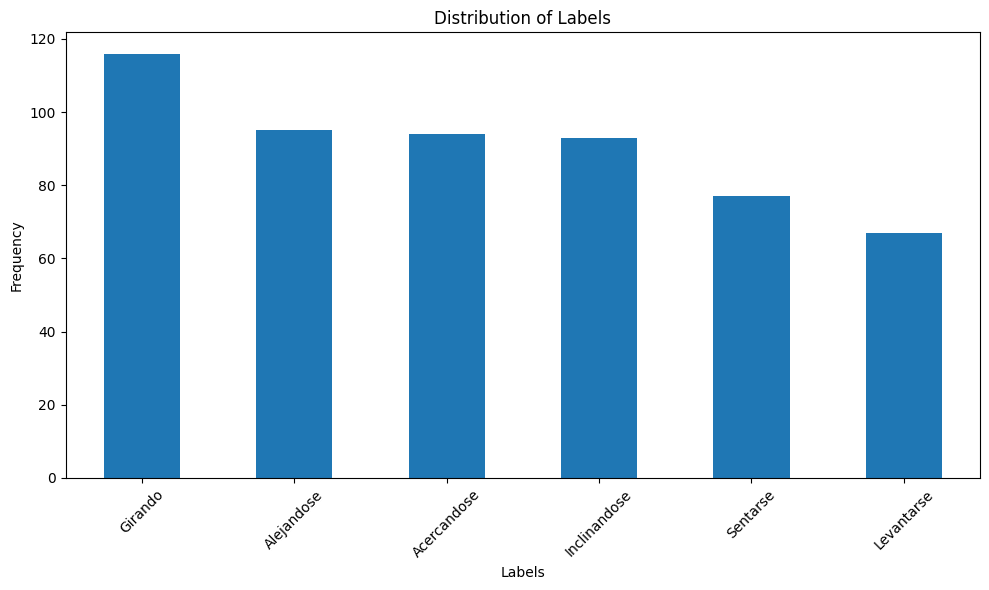

In [29]:
# Count the occurrences of each unique label
label_counts = df['label'].value_counts()

# Plot the distribution of labels
plt.figure(figsize=(10, 6))
label_counts.plot(kind='bar')
plt.title('Distribution of Labels')
plt.xlabel('Labels')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [30]:
# Count each label
label_counts

,count
label,
Girando,116
Alejandose,95
Acercandose,94
Inclinandose,93
Sentarse,77
Levantarse,67


In [31]:
# Calculate the correlation matrix for the numeric columns
correlation_matrix = df[numeric_columns].corr()

print(f"correlation matrix \n{correlation_matrix}")

correlation matrix 
           x0_0      y0_0      z0_0      x0_1      y0_1      z0_1      x0_2  \
x0_0   1.000000  0.214418  0.093033  0.995111  0.211328  0.130095  0.989107   
y0_0   0.214418  1.000000 -0.057667  0.203247  0.999590 -0.012146  0.201577   
z0_0   0.093033 -0.057667  1.000000  0.017083 -0.059885  0.995652 -0.030533   
x0_1   0.995111  0.203247  0.017083  1.000000  0.200561  0.053484  0.998615   
y0_1   0.211328  0.999590 -0.059885  0.200561  1.000000 -0.014713  0.198989   
...         ...       ...       ...       ...       ...       ...       ...   
y4_31 -0.116266 -0.710406 -0.013102 -0.090447 -0.715244 -0.023164 -0.079937   
z4_31  0.541209  0.338002  0.051505  0.508833  0.333598  0.088664  0.498192   
x4_32  0.649916  0.316015  0.550416  0.584128  0.307745  0.582985  0.550520   
y4_32  0.064386 -0.688864 -0.016211  0.082999 -0.695061 -0.012449  0.092262   
z4_32 -0.318038 -0.035051  0.152164 -0.318691 -0.034329  0.104442 -0.326872   

           y0_2      z0_2      

## **Normalizacion centrada en el cuerpo**

Dado que los datos representan coordenadas de articulaciones, optaremos por centrar las coordenadas en una articulación específica del cuerpo, que  en este caso sera la cadera, que se mantendra como el "punto de referencia". Esto ayudaría a hacer las coordenadas invariantes a la posición general del cuerpo, lo cual es útil en tareas de reconocimiento de actividades.

In [32]:
import pandas as pd

# Supongamos que tienes un DataFrame llamado df y que tus coordenadas (x, y, z) están organizadas por articulación
# y tienes una columna llamada 'label' que queremos dejar sin normalizar.

# Creamos una copia del DataFrame para trabajar en los datos sin alterar el original
df_copy = df.copy()

# Separar las características y las etiquetas
X = df_copy.drop(columns=['label'])
y = df_copy['label']

# Normalización centrada en la cadera
# Obtener las coordenadas de referencia de la cadera (hip), en este caso, usando las articulaciones 23 (left_hip) y 24 (right_hip)
# Calculamos el promedio entre las dos caderas para tener un único punto de referencia central
X['hip_x'] = (X['x0_23'] + X['x0_24']) / 2
X['hip_y'] = (X['y0_23'] + X['y0_24']) / 2
X['hip_z'] = (X['z0_23'] + X['z0_24']) / 2

# Restamos el punto de referencia de cadera a todas las coordenadas (centrando)
for i in range(33):  # 33 puntos de referencia en MediaPipe
    X[f'x0_{i}'] -= X['hip_x']
    X[f'y0_{i}'] -= X['hip_y']
    X[f'z0_{i}'] -= X['hip_z']

# Eliminamos las columnas de referencia para no interferir en el entrenamiento
X = X.drop(columns=['hip_x', 'hip_y', 'hip_z'])

# Volvemos a unir las características normalizadas con las etiquetas en un solo DataFrame
df_normalized = pd.concat([X, y.reset_index(drop=True)], axis=1)

In [33]:
df_normalized.head()

,x0_0,y0_0,z0_0,x0_1,y0_1,z0_1,x0_2,y0_2,z0_2,x0_3,...,x4_30,y4_30,z4_30,x4_31,y4_31,z4_31,x4_32,y4_32,z4_32,label
0,0.001825,-0.479199,0.487967,-0.013013,-0.490790,0.364138,-0.026951,-0.486894,0.363988,-0.041365,...,0.667207,0.936307,0.786006,0.310094,0.930053,0.494194,0.703053,0.913614,0.653936,Alejandose
1,0.015515,-0.420845,0.297352,0.007430,-0.440543,0.166359,-0.002333,-0.441548,0.166285,-0.009427,...,0.680147,0.932258,0.599327,0.316262,0.911355,0.515476,0.735894,0.903429,0.492375,Alejandose
2,0.034770,-0.437220,0.534398,0.028097,-0.454933,0.400834,0.019464,-0.453937,0.400821,0.011836,...,0.694696,0.965023,0.542805,0.290934,0.935898,0.262445,0.739012,0.936014,0.420793,Alejandose
3,0.024544,-0.443001,0.619776,0.017555,-0.460735,0.486650,0.009136,-0.458425,0.486671,0.001540,...,0.715641,0.949035,0.515983,0.305156,0.913052,0.321775,0.740670,0.910056,0.404757,Alejandose
4,0.005410,-0.420472,0.578038,-0.010602,-0.432964,0.451172,-0.021821,-0.431014,0.451148,-0.033003,...,0.722716,0.939159,0.510125,0.316890,0.874674,0.422538,0.754393,0.900885,0.394308,Alejandose


## **Estandarizacion**

Después de centrar los datos, vamos a aplicar una estandarización (media 0 y desviación estándar 1) para cada coordenada (x, y, z) de las articulaciones. Esto puede ayudar a mejorar la estabilidad del entrenamiento en algunos modelos, especialmente en redes neuronales.

In [34]:
from sklearn.preprocessing import StandardScaler

# Aplicamos estandarización en las coordenadas centradas
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

# Convertimos de nuevo a DataFrame
X_standardized_df = pd.DataFrame(X_standardized, columns=X.columns)

# Volvemos a unir con las etiquetas
df_standardized = pd.concat([X_standardized_df, y.reset_index(drop=True)], axis=1)


In [35]:
df_standardized.head()

,x0_0,y0_0,z0_0,x0_1,y0_1,z0_1,x0_2,y0_2,z0_2,x0_3,...,x4_30,y4_30,z4_30,x4_31,y4_31,z4_31,x4_32,y4_32,z4_32,label
0,-0.307677,-3.252280,1.441138,-0.467657,-3.238071,1.218666,-0.619619,-3.201751,1.218369,-0.773757,...,1.342101,1.995376,3.511244,-2.136758,1.571562,2.138109,0.856162,1.113743,3.552587,Alejandose
1,-0.178121,-2.340437,0.912645,-0.273060,-2.457682,0.606898,-0.383577,-2.492978,0.606819,-0.466256,...,1.460984,1.911916,2.594423,-2.091560,1.208469,2.229979,1.039247,0.915683,2.786528,Alejandose
2,0.004111,-2.596313,1.569871,-0.076324,-2.681166,1.332174,-0.174587,-2.686629,1.332304,-0.261536,...,1.594653,2.587215,2.316828,-2.277166,1.685058,1.137714,1.056628,1.549321,2.447113,Alejandose
3,-0.092668,-2.686653,1.806586,-0.176673,-2.771281,1.597622,-0.273610,-2.756775,1.597859,-0.360662,...,1.787087,2.257706,2.185101,-2.172948,1.241422,1.393826,1.065875,1.044553,2.371075,Alejandose
4,-0.273745,-2.334608,1.690864,-0.444711,-2.339964,1.487882,-0.570429,-2.328344,1.487979,-0.693245,...,1.852084,2.054153,2.156329,-2.086958,0.496195,1.828792,1.142380,0.866211,2.321529,Alejandose


## **Entrenamiento de modelos con ajuste de hiperparametros**

Se dividira el conjunto de datos en entrenamiento y prueba para evaluar el rendimiento de los modelos y asegurarnos de que no estamos sobreajustando.

Procederemos a probar varios modelos de clasificación comúnmente utilizados en el reconocimiento de actividades:

- K-Nearest Neighbors (KNN)
- Random Forest
- Support Vector Machine (SVM)
- Red Neuronal (MLPClassifier)

Para cada uno, incluiremos el ajuste de hiperparámetros mediante una búsqueda en cuadrícula (GridSearchCV).



In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score

df = df_standardized.copy()
# Cargamos el DataFrame y separamos características y etiquetas
X = df.drop(columns=['label'])
y = df['label']

# Dividimos los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Diccionario para almacenar los modelos y sus hiperparámetros
models = {
    'KNN': (KNeighborsClassifier(), {'n_neighbors': [3, 5, 7, 9]}),
    'RandomForest': (RandomForestClassifier(), {'n_estimators': [50, 100, 150], 'max_depth': [10, 20, None]}),
    'SVM': (SVC(), {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}),
    'MLP': (MLPClassifier(max_iter=500), {'hidden_layer_sizes': [(50,), (100,), (50, 50)], 'alpha': [0.0001, 0.001]})
}

# Almacenamos los mejores modelos y sus resultados
best_models = {}
for model_name, (model, params) in models.items():
    print(f'Entrenando modelo: {model_name}')
    grid_search = GridSearchCV(model, params, cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_models[model_name] = grid_search.best_estimator_
    print(f'Mejores hiperparámetros para {model_name}: {grid_search.best_params_}')
    print(f'Mejor precisión en entrenamiento: {grid_search.best_score_}')

# Evaluación de los mejores modelos en el conjunto de prueba
for model_name, best_model in best_models.items():
    y_pred = best_model.predict(X_test)
    print(f'\nEvaluación del modelo {model_name}')
    print(classification_report(y_test, y_pred))
    print(f'Precisión en el conjunto de prueba: {accuracy_score(y_test, y_pred)}')


Entrenando modelo: KNN
Mejores hiperparámetros para KNN: {'n_neighbors': 3}
Mejor precisión en entrenamiento: 0.9053996257685111
Entrenando modelo: RandomForest
Mejores hiperparámetros para RandomForest: {'max_depth': 20, 'n_estimators': 150}
Mejor precisión en entrenamiento: 0.9377439187383052
Entrenando modelo: SVM
Mejores hiperparámetros para SVM: {'C': 10, 'kernel': 'linear'}
Mejor precisión en entrenamiento: 0.9261694734028335
Entrenando modelo: MLP
Mejores hiperparámetros para MLP: {'alpha': 0.0001, 'hidden_layer_sizes': (100,)}
Mejor precisión en entrenamiento: 0.9631114675220529

Evaluación del modelo KNN
              precision    recall  f1-score   support

 Acercandose       1.00      0.75      0.86        16
  Alejandose       1.00      1.00      1.00        30
     Girando       0.82      1.00      0.90        23
Inclinandose       0.90      0.82      0.86        11
  Levantarse       0.67      0.89      0.76         9
    Sentarse       0.94      0.80      0.86        20
